# **API Homework**

In [31]:
#1: Take user input for stock
stock=input()
if len(stock)>5:
    print('Stock ticker longer than expected - make sure this is a valid stock')

aapl


In [32]:
#2: Display stock information
import json
import pandas as pd
import requests

apikey="0KygXqIx5o2oUo63JiMNE4XTYRIqGd4I3MPToqcO"
url_insights='https://yfapi.net/ws/insights/v1/finance/insights?symbol='+stock
url_quote='https://yfapi.net/v6/finance/quote'
#This request needs a region, instructions didn't specify which (or if user should input) so I used US
url_trend='https://yfapi.net/v1/finance/trending/US'
querystring = {"symbols":stock}
headers = {
    'x-api-key': apikey
    }
response_insights = requests.request("GET", url_insights, headers=headers, params=querystring)
insight_json=response_insights.json()
response_quote = requests.request("GET", url_quote, headers=headers, params=querystring)
quote_json=response_quote.json()
response_trend = requests.request("GET", url_trend, headers=headers, params=querystring)
trend_json=response_trend.json()
#first statement is the result of missing api key, second is result of invalid request (like missing querystring)
#third is an empty result from a bad ticker
if 'message' in quote_json or 'finance' in quote_json:
    print('Something went wrong with the query - check that the parameters are correct and that the API is running.')
if quote_json['quoteResponse']['result'] == []:
    print('The query returned empty json - check to make sure you input a valid stock ticker. The finance API might also be down.')
else:
    print('Stock Ticker Name: '+stock)
    print('Stock Full Name: '+quote_json['quoteResponse']['result'][0]['longName'])
    print('Current Price: '+str(quote_json['quoteResponse']['result'][0]['regularMarketPrice']))
    #The instructions said to find mean target price, but I couldn't find a mean target price listed anywhere at financeapi.net
    #I assumed the assignment wanted target price
    print('Target Price is: '+str(insight_json['finance']['result']['instrumentInfo']['recommendation']['targetPrice']))
    print('52 Week High: '+str(quote_json['quoteResponse']['result'][0]['regularMarketDayHigh']))
    print('52 Week Low: '+str(quote_json['quoteResponse']['result'][0]['regularMarketDayLow']))
#use trend.json to print 5 trending stocks
print('Trending Stocks:')
for s in trend_json['finance']['result'][0]['quotes'][:5]:
    print(s)


Stock Ticker Name: aapl
Stock Full Name: Apple Inc.
Current Price: 225.77
Target Price is: 250.0
52 Week High: 225.975
52 Week Low: 223.25
Trending Stocks:
{'symbol': 'PLTR'}
{'symbol': 'DJT'}
{'symbol': 'WW'}
{'symbol': 'INTC'}
{'symbol': 'HOOD'}


In [33]:
#3: put all of the displayed data in a pandas dataframe
#I chose not to directly convert the json to a dataframe since all of the modules contain extra info the problem statement didn't ask for
df=pd.DataFrame({
    'Stock Ticker Name':[stock],
    'Stock Full Name':[quote_json['quoteResponse']['result'][0]['longName']],
    'Current Price':[quote_json['quoteResponse']['result'][0]['regularMarketPrice']],
    'Target Price':[insight_json['finance']['result']['instrumentInfo']['recommendation']['targetPrice']],
    '52 Week High':[quote_json['quoteResponse']['result'][0]['regularMarketDayHigh']],
    '52 Week Low':[quote_json['quoteResponse']['result'][0]['regularMarketDayLow']],
})
df.to_csv('stock_data.csv')
df

,Stock Ticker Name,Stock Full Name,Current Price,Target Price,52 Week High,52 Week Low
0,aapl,Apple Inc.,225.77,250.0,225.975,223.25


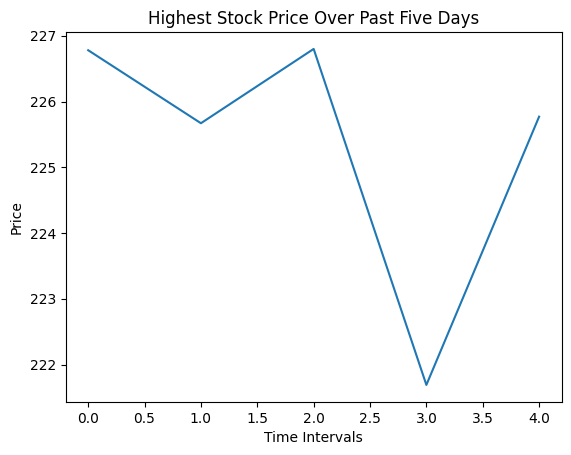

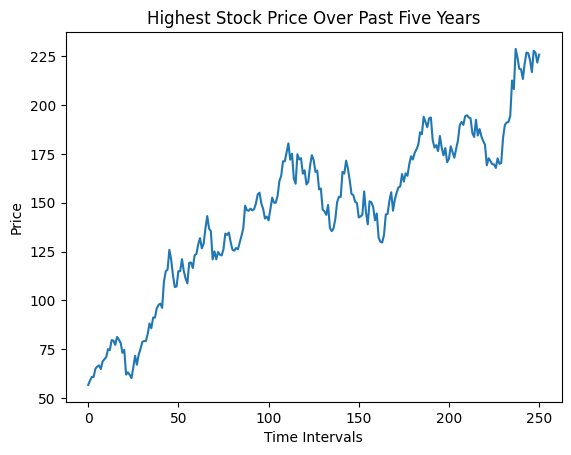

In [37]:
#5: Bonus
import matplotlib.pyplot as plt

url='https://yfapi.net/v8/finance/spark/'
#The directions say to output the historical price of a stock's highest value over the past five days
#I was unclear about these instructions - does historical mean it should be a longer period, or only five days, and what should the interval be?
#I decided to display two graphs - the first shows high price each day over the last five days
#Second graph shows five day high over the past five years
#Range determines how long the data goes back, range determines how often we take the measurement, so either can be adjusted
query1={'symbols':stock,'range':'5d','interval':'1d'}
query2={'symbols':stock,'range':'5y','interval':'5d'}
response_spark1 = requests.request("GET", url, headers=headers, params=query1)
response_spark2 = requests.request("GET", url, headers=headers, params=query2)
spark_json1=response_spark1.json()
spark_json2=response_spark2.json()
prices1=spark_json1[stock]['close']
prices2=spark_json2[stock]['close']
plt.plot(range(len(prices1)),prices1)
plt.xlabel('Time Intervals')
plt.ylabel('Price')
plt.title('Highest Stock Price Over Past Five Days')
plt.show()
plt.plot(range(len(prices2)),prices2)
plt.xlabel('Time Intervals')
plt.ylabel('Price')
plt.title('Highest Stock Price Over Past Five Years')
plt.show()